In [2]:
import nltk

text="Metehan is studying Computer Engineering at Ataturk University. He will graduate in 2026."

#1. Cümlelere Bölme işlemi (Sentence Tokenization)
sentences=nltk.sent_tokenize(text)  # cümleleri birbirinden ayıran fonksiyon
print("Cümleler:")
print(sentences)

#2. Kelimeler Bölme işlemi (Word Tokenization)
words=nltk.word_tokenize(text)  # kelimeleri birbirinde ayıran fonksiyon
print("\nKelimeler:")
print(words)

#3. Kelimeleri etiketleme işlemi (POS Tagging)
pos_tags=nltk.pos_tag(words)  # kelimeleri etiketleyen fonksiyon
print("\nKelimeler ve etiketler:")
print(pos_tags)

Cümleler:
['Metehan is studying Computer Engineering at Ataturk University.', 'He will graduate in 2026.']

Kelimeler:
['Metehan', 'is', 'studying', 'Computer', 'Engineering', 'at', 'Ataturk', 'University', '.', 'He', 'will', 'graduate', 'in', '2026', '.']

Kelimeler ve etiketler:
[('Metehan', 'NNP'), ('is', 'VBZ'), ('studying', 'VBG'), ('Computer', 'NNP'), ('Engineering', 'NNP'), ('at', 'IN'), ('Ataturk', 'NNP'), ('University', 'NNP'), ('.', '.'), ('He', 'PRP'), ('will', 'MD'), ('graduate', 'VB'), ('in', 'IN'), ('2026', 'CD'), ('.', '.')]


* NNP: Tekil özel isim (Proper noun, singular)
* VBZ: Üçüncü tekil şahıs için şimdiki zaman fiili (Verb, 3rd person singular present)
* NN: Tekil veya sayılamayan isim (Noun, singular or mass)
* NNS: Çoğul isim (Noun, plural)
* VB: Fiilin yalın hali (Verb, base form)
* VBD: Geçmiş zaman fiili (Verb, past tense)
* JJ: Sıfat (Adjective)
* ...

In [3]:
import nltk
from nltk.stem import PorterStemmer

stremmer=PorterStemmer()

words=["taking","married","flying","running","jumping","reading","wanted","killed","scored","flies","quickly"]

word_roots=[stremmer.stem(word) for word in words] # kelimeleri köklerine ayırmak için for döngüsü ve stem() fonksiyonu kullandık

for word,word_root in zip(words,word_roots): # kelimeleri ve köklerini ekrana yazdırdık
    print(f"{word}---------------------------------------->{word_root}")

taking---------------------------------------->take
married---------------------------------------->marri
flying---------------------------------------->fli
running---------------------------------------->run
jumping---------------------------------------->jump
reading---------------------------------------->read
wanted---------------------------------------->want
killed---------------------------------------->kill
scored---------------------------------------->score
flies---------------------------------------->fli
quickly---------------------------------------->quickli


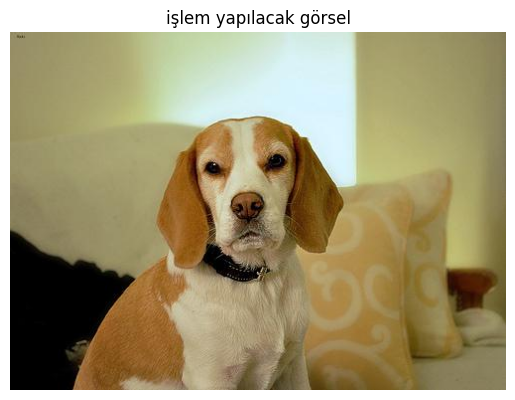

In [5]:
import cv2
import matplotlib.pyplot as plt

image_path=r"C:\Users\meteh\kedikopek\train\dog\beagle_107_jpg.rf.037c70e929a7efe902543c13653a96ee.jpg"
image=cv2.imread(image_path)

image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.title("işlem yapılacak görsel")
plt.show()

cmd(komut istemi) yardımıyla labelme kullanarak anotasyon işlemini yapıp json dosyası olarak kaydettim

In [8]:
import json

#anotasyon dosyasını yükledik
json_path=r"C:\Users\meteh\kopek_label.json"

with open(json_path,"r") as f:
    data=json.load(f)

In [12]:
import os
import json
import numpy as np
from PIL import Image

# Görüntü yolunu belirledik
image_path =r"C:\Users\meteh\kedikopek\train\dog\beagle_107_jpg.rf.037c70e929a7efe902543c13653a96ee.jpg"

# Görüntüyü yükleme işlemi
img = Image.open(image_path)
images = [np.array(img)]  # Görüntüyü numpy array'e çeviriyoruz

# JSON dosyasının yolunu belirleme 
json_path = r"C:\Users\meteh\kopek_label.json"

# JSON dosyasını açma ve içeriğini okuma
with open(json_path, 'r') as f:
    data = json.load(f)

# JSON dosyasındaki etiketleri ve koordinatları çekme
label = data['shapes'][0]['label']
points = data['shapes'][0]['points']  # Anotasyon koordinatları
labels = [label]  # Tek bir görüntü için etiket

# Anotasyon bilgilerini gösterme
print(":GENEL BİLGİLER:")
print(f"Görüntü: {image_path}, Etiket: {label}, Koordinatlar: {points}")

:GENEL BİLGİLER:
Görüntü: C:\Users\meteh\kedikopek\train\dog\beagle_107_jpg.rf.037c70e929a7efe902543c13653a96ee.jpg, Etiket: kopek, Koordinatlar: [[73.22175732217572, 78.40794979079499], [355.23012552301253, 75.47907949790796], [356.4853556485356, 358.3242677824268], [59.4142259414226, 359.99790794979083]]


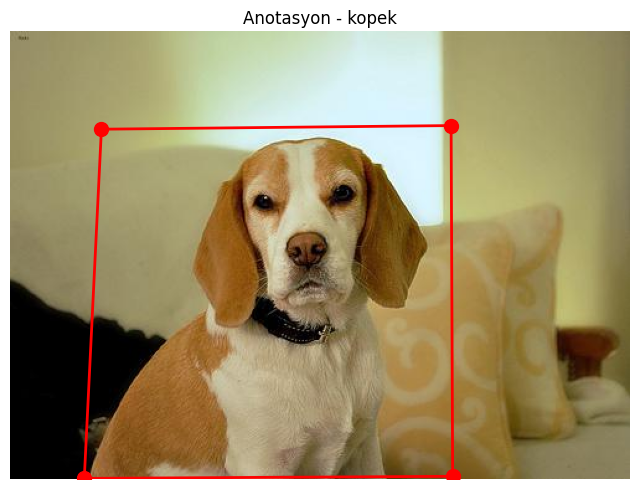

In [11]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Görüntüyü yükleme işlemi
img = Image.open(image_path)
img_array = np.array(img)  # Görüntüyü numpy array'e çeviriyoruz



# JSON dosyasını açma ve içeriğini okuma işlemi
with open(json_path, 'r') as f:
    data = json.load(f)

# JSON dosyasındaki bilgiler
label = data['shapes'][0]['label']
points = data['shapes'][0]['points']  # Anotasyon noktaları (koordinatlar)

# Görüntüyü görselleştirme ve anotasyon noktalarını ekleme işlemi
plt.figure(figsize=(8, 8))
plt.imshow(img_array)

# Anotasyon noktalarını görselleştirme (nokta şeklinde)
for point in points:
    plt.scatter(point[0], point[1], c='red', s=100, label=label)

# Anotasyon alanını (noktalar arası çizgi) kapalı şekilde çizme
# Temel Python listeleri kullanarak kapalı şekil çizme
x_coords = [p[0] for p in points]  # x koordinatlarını ayırma
y_coords = [p[1] for p in points]  # y koordinatlarını ayırma

# İlk ve son noktayı birleştirme
x_coords.append(x_coords[0])
y_coords.append(y_coords[0])

# Kırmızı çizgiyle bağlantı çizme
plt.plot(x_coords, y_coords, 'r-', linewidth=2)  # Kırmızı çizgiyle bağlantı

# Görüntüyü gösterme
plt.title(f"Anotasyon - {label}")
plt.axis('off')
plt.show()

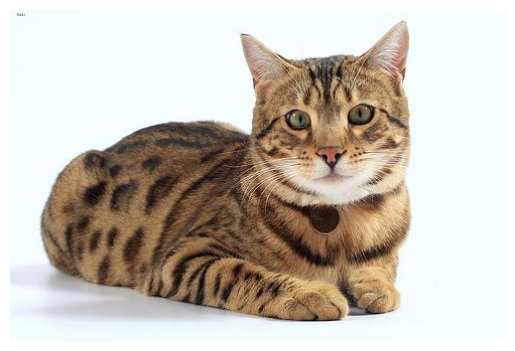

In [15]:
import cv2
import matplotlib.pyplot as plt

# Görseli yükleDİK
image_path = r'C:\Users\meteh\kedikopek\train\cat\Bengal_109_jpg.rf.aed42b8605ef92b579992d02e2e2cc4c.jpg'
image = cv2.imread(image_path)

# BGR formatından RGB'ye çevirme işlemi yaptık
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görseli gösterdik
plt.imshow(image_rgb)
plt.axis('off')  # Eksenleri kaldır
plt.show()

In [16]:
label=input("Ekranda gördüğünüz hayvan Kedi mi Köpek mi?")

Ekranda gördüğünüz hayvan Kedi mi Köpek mi? Kedi


In [18]:
import json

anotasyon={
    "Image_Path":image_path,
    "Label":label
}
with open("anotasyon.json","w") as outfile:
    json.dump(anotasyon,outfile)
print(f"Etiketleme tamamlandı: {anotasyon}") 

Etiketleme tamamlandı: {'Image_Path': 'C:\\Users\\meteh\\kedikopek\\train\\cat\\Bengal_109_jpg.rf.aed42b8605ef92b579992d02e2e2cc4c.jpg', 'Label': 'Kedi'}
